In [90]:
import pandas as pd

In [226]:
# Cargar base de datos
df = pd.read_csv("data/data_clean.csv")

In [235]:
# Crear columna llamada Costo_Total_Utilizaciones con Cantidad_Utilizaciones * Costo_Unitario
df["Costo_Total_Utilizaciones"] = (
    df["Cantidad_Utilizaciones"] * df["Precio_Utilización"]
)



In [236]:
df

,Afiliado_Id,Cantidad_Utilizaciones,Fecha_Reclamacion,Diagnostico_Desc,Reclamacion_Desc,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,...,Poliza_Id,FECHA_INICIO,FECHA_FIN,Edad,Precio_Utilización,Duración_Póliza_Rango,Días_en_reclamar,precio_total_utilizaciones,costo_promedio_por_paciente,Costo_Total_Utilizaciones
0,2668445,1.0,2019-10-28,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,...,141480119.0,2019-09-01,2019-12-31,61.0,46500.0,>= 3.5 Meses,57,46500.0,336483.0,46500.0
1,2668445,1.0,2019-10-01,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,...,141480119.0,2019-09-01,2019-12-31,61.0,55676.0,>= 3.5 Meses,30,55676.0,336483.0,55676.0
2,2668445,2.0,2019-09-11,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,...,141480119.0,2019-09-01,2019-12-31,61.0,78926.0,>= 3.5 Meses,10,157852.0,336483.0,157852.0
3,2668445,6.0,2019-09-20,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,0.0,0.0,0.0,1.0,0.0,...,141480119.0,2019-09-01,2019-12-31,61.0,12742.5,>= 3.5 Meses,19,76455.0,336483.0,76455.0
4,4370072,2.0,2019-09-30,DIAGNÓSTICO PENDIENTE,FISIOTERAPIA ILIMITADA,0.0,0.0,0.0,0.0,0.0,...,111025100.0,2019-09-01,2019-12-31,58.0,21204.0,>= 3.5 Meses,29,42408.0,1322148.0,42408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638062,15014053,1.0,2019-10-03,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,...,157659159.0,2019-09-01,2019-12-31,43.0,56916.0,>= 3.5 Meses,32,56916.0,56916.0,56916.0
638063,42274571,1.0,2019-12-06,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,...,203160909.0,2019-11-06,2019-12-31,14.0,85312.0,1.5-2.5 Meses,30,85312.0,85312.0,85312.0
638064,25921043,1.0,2019-09-24,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,0.0,0.0,0.0,0.0,0.0,...,195289232.0,2019-09-01,2019-12-31,30.0,2461.0,>= 3.5 Meses,23,2461.0,2461.0,2461.0
638065,54788170,1.0,2019-09-02,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,...,159472544.0,2019-09-01,2019-12-31,10.0,63364.0,>= 3.5 Meses,1,63364.0,63364.0,63364.0


1173442.0

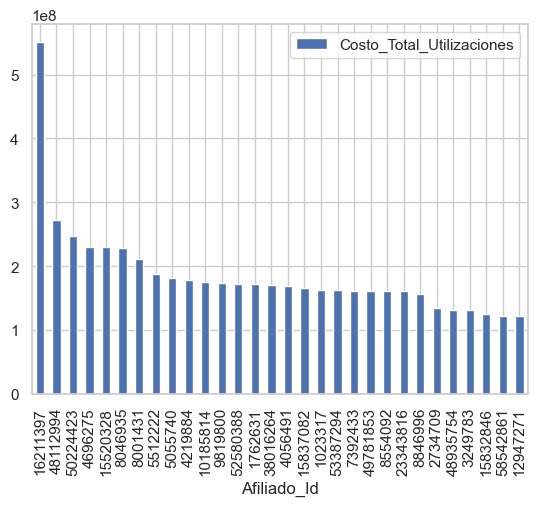

In [243]:

# Graficar los 10 primeros 
df.groupby(["Afiliado_Id"]).agg(
    {"Costo_Total_Utilizaciones": "sum"}
).reset_index().sort_values(by="Costo_Total_Utilizaciones", ascending=False).head(
    30
).plot.bar(
    x="Afiliado_Id", y="Costo_Total_Utilizaciones"
);

# Cual es el promedio de Costo_Total_Utilizaciones por Afiliado
Costo_Total_Utilizaciones_afiliado = (
    df.groupby(["Afiliado_Id"])
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .reset_index()
    .sort_values(by="Costo_Total_Utilizaciones", ascending=False)
)

Costo_Total_Utilizaciones_afiliado["Costo_Total_Utilizaciones"].mean().round(0)

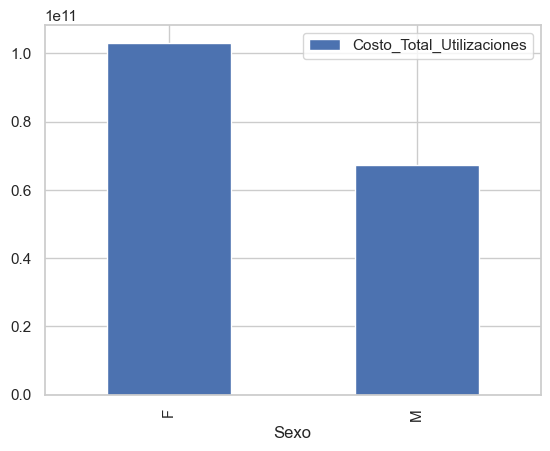

In [246]:
# graficar la suma de costo total por sexo
df.groupby(["Sexo"]).agg({"Costo_Total_Utilizaciones": "sum"}).reset_index().plot.bar(
    x="Sexo", y="Costo_Total_Utilizaciones"
);

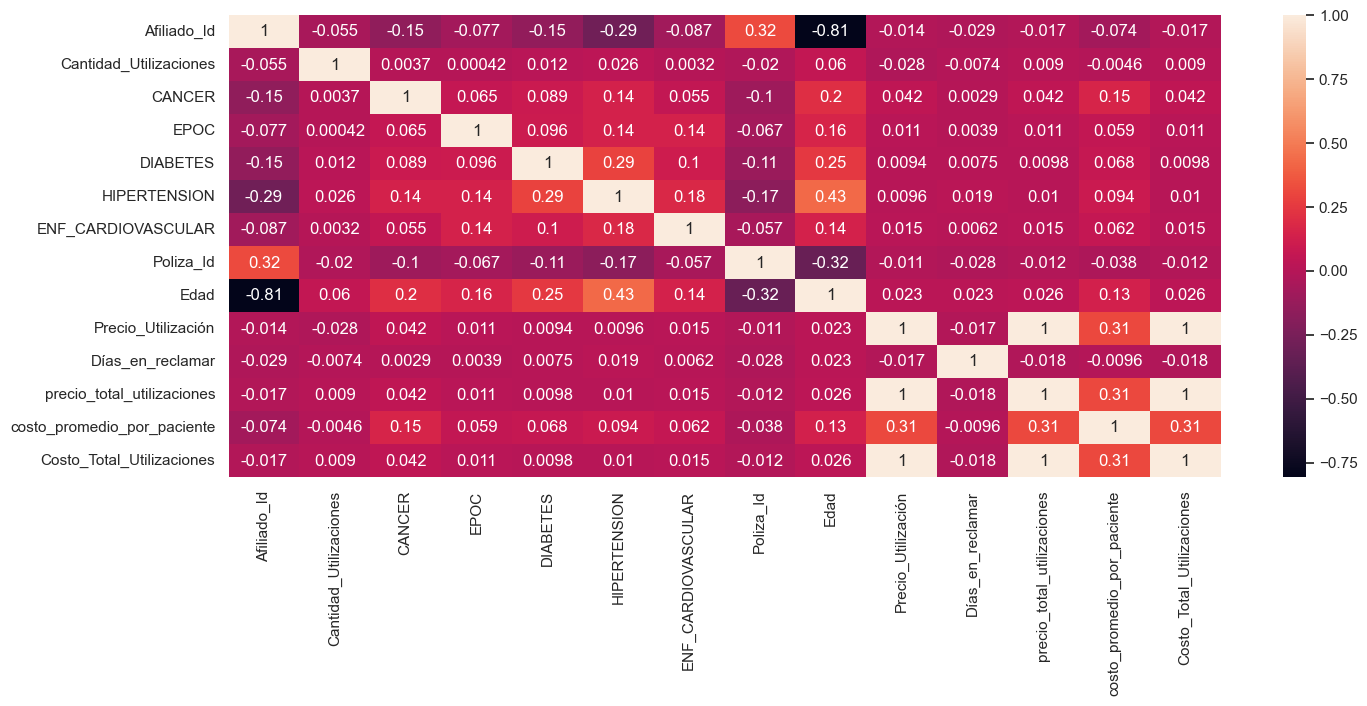

In [249]:
# matriz de correlación y mapa de calor
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True);

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


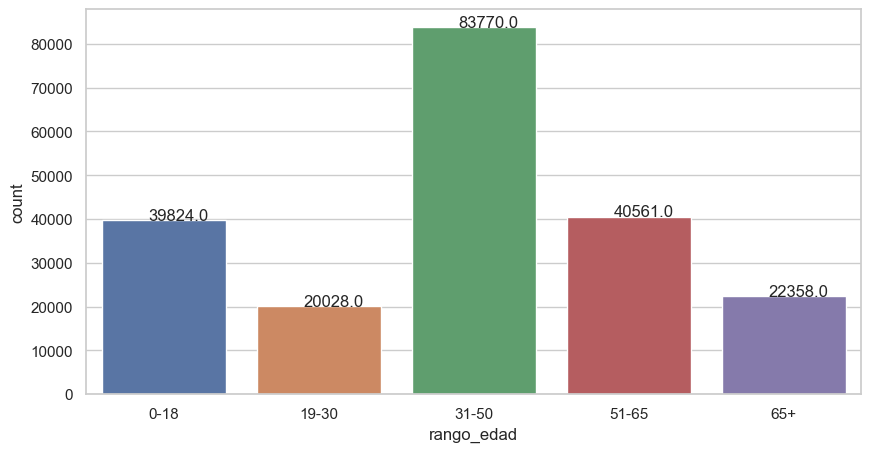

In [183]:
# crear rango de edades
tab['Edad'] = tab['Edad'].astype(int)
tab['rango_edad'] = pd.cut(tab['Edad'], [0, 18, 30, 50, 65, 200], labels=['0-18', '19-30', '31-50', '51-65', '65+'])


# contar los registros por rango de edad
tab['rango_edad'].value_counts()

# hacer grafiaca de barras de los rangos de edad
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x='rango_edad', data=tab)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.5))
plt.show()


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


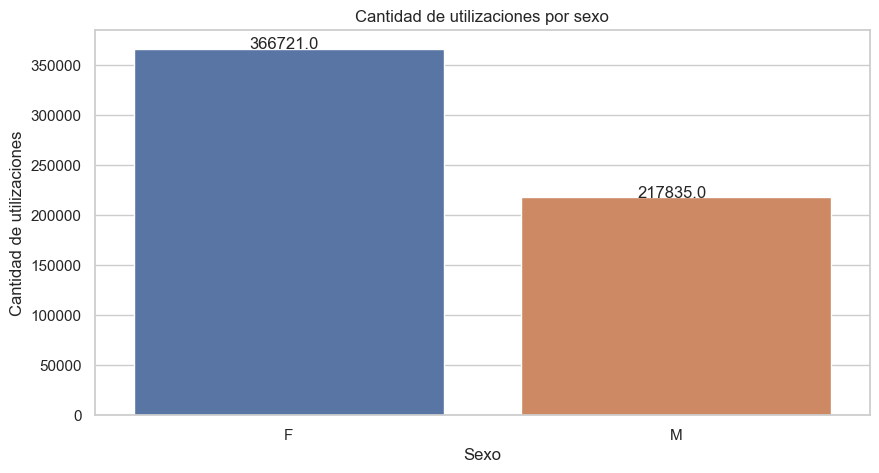

In [187]:
# Grafico de barras para la cantidad de utilizaciones por sexo
# poner etiquetas de conteo sobre las barras
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Sexo", y="Cantidad_Utilizaciones", data=tab2)
plt.title('Cantidad de utilizaciones por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de utilizaciones')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.5))
plt.show()


In [195]:
# sumar el precio total de 'costo_prom' por 'Sexo'
tab2.groupby('Sexo')['costo_prom'].mean()


Sexo
F    inf
M    inf
Name: costo_prom, dtype: float64

In [97]:
# separar variables categoricas y numericas
cat = df.select_dtypes(include = ["object"]).columns
num = df.select_dtypes(include = ["float64", "int64"]).columns

In [216]:
# Graficamos matriz de correlación para variables numéricas a través de un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(num.corr(), annot=True)
plt.title("Matriz de correlación para variables numéricas")
plt.show()

AttributeError: 'Index' object has no attribute 'corr'

<Figure size 1600x600 with 0 Axes>

In [98]:
cat

Index(['Fecha_Reclamacion', 'Diagnostico_Desc', 'Reclamacion_Desc', 'Sexo',
       'Regional_desc', 'FECHA_INICIO', 'FECHA_FIN', 'Duración_Póliza_Rango'],
      dtype='object')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


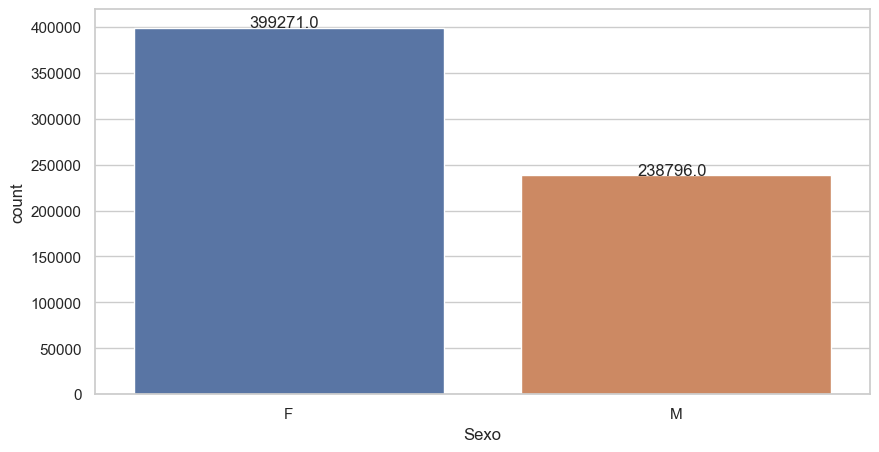

In [99]:
#hacer gráfico de barras para la variable 'Sexo'
# poner etiquetas sobre las barras
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Sexo', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.5))
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


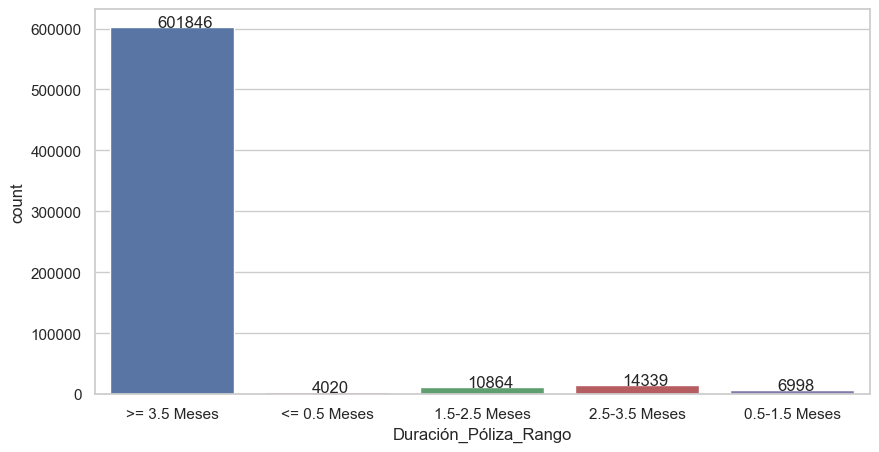

In [100]:
# hacer grafico de barras para la variable 'Duración_Póliza_Rango'

# poner etiquetas sobre las barras
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Duración_Póliza_Rango', data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))
plt.show()



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


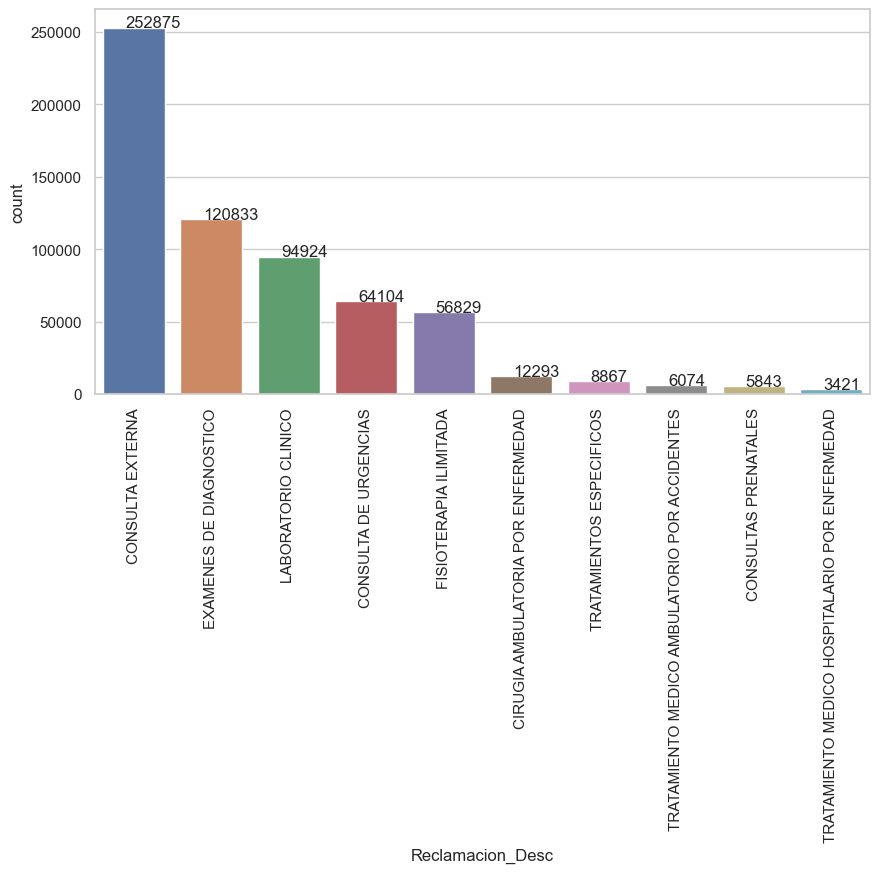

In [101]:
# hacer grafico de barras para la variable 'Reclamacion_Desc' con las 10 primeras categorias

# poner los nombres de las categorias de forma vertical
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Reclamacion_Desc', data=df, order=df['Reclamacion_Desc'].value_counts().iloc[:10].index)
for item in ax.get_xticklabels():
    item.set_rotation(90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))
plt.show()



